In [1]:
# first we import all relevant packages
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import pandas as pd
from scipy import stats
from scipy.stats import binned_statistic
import pickle
age = 13.800797497330507

In [2]:
# we set the global matplotlib parameters so the fonts are all consistent and serif 
mpl.rc('font',**{'family':'serif','monospace':['Palatino']})
mpl.rc('text', usetex=True)
mpl.rcParams.update({'font.size': 9})
mpl.rcParams['hatch.linewidth'] = 0.8

In [5]:
def read_timescales():
    '''Function to read in the data file which contains quenching and infall times'''
    data = []
    with open('../../Data/QuenchingTimescales.data', 'rb') as f:
    # with open('../../Timescales/QuenchingTimescales_sSFR_F19.data', 'rb') as f:
        while True:
            try:
                data.append(pickle.load(f,encoding='latin1'))
            except EOFError:
                break

    data = pd.DataFrame(data)
    return data

In [3]:
def read_tracking_data(name):
    '''Function to read in the data file which contains hot gas particle tracking data'''
    data = []
    with open(f'../../Data/stripping_data/{name}.data', 'rb') as f:
        while True:
            try:
                data.append(pickle.load(f,encoding='latin1'))
            except EOFError:
                break

    data = pd.DataFrame(data)
    return data

def read_z0(name):
    '''Function to read in z=0 data files'''
    data = []
    with open(f'../../Data/z0_data/{name}.data', 'rb') as f:
        while True:
            try:
                data.append(pickle.load(f,encoding='latin1'))
            except EOFError:
                break

    data = pd.DataFrame(data)
    return data

def read_timesteps(name):
    '''Function to read in timestep data files'''
    data = []
    with open(f'../../Data/timesteps_data/{name}.data', 'rb') as f:
        while True:
            try:
                data.append(pickle.load(f,encoding='latin1'))
            except EOFError:
                break

    data = pd.DataFrame(data)
    return data

In [24]:
timescales = read_timescales()
quenched = np.array(timescales.quenched, dtype=bool)
tau = np.array(timescales.tinfall) - np.array(timescales.tquench)
quench_after_infall = tau > 0

resolved = np.array(timescales.n_star, dtype=int) > 100
satellites = ~np.isnan(np.array(timescales.tinfall))

timescales = timescales[quenched & quench_after_infall]

len(timescales)

/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


22

In [118]:
timescales = read_timescales()
quenched = np.array(timescales.quenched, dtype=bool)
tau = np.array(timescales.tinfall) - np.array(timescales.tquench)
quench_after_infall = tau > 0

resolved = np.array(timescales.n_star, dtype=int) > 100
satellites = ~np.isnan(np.array(timescales.tinfall))

timescales = timescales[quenched & satellites & resolved]

print(f'There are {len(timescales)} resolved satellites that are quenched at z=0.')

gas_masses = np.array([])
sims, haloids = np.array(timescales.sim), np.array(timescales.haloid)
for sim, haloid in zip(sims,haloids):
    d = read_z0(sim)
    d = d[d.haloid==haloid]
    Mgas = d.M_gas.tolist()[0]
    t = timescales[(timescales.sim==sim)&(timescales.haloid==haloid)]
    tinfall = t.tinfall.tolist()[0]
    
    gas_masses = np.append(gas_masses, Mgas)
    if Mgas != 0:
        print(f'{sim}-{haloid}: n_star = {d.n_star.tolist()[0]}, tinfall = {tinfall:.2f} Gyr ago, sSFR = {d.sSFR.tolist()[0]:.2e}')

print(f'Of these {len(timescales)}, only {len(gas_masses[gas_masses != 0])} have gas at z=0.')
print(fr"These are:")
print(*[str(s)+'-'+str(h) for s,h in zip(sims[gas_masses != 0], haloids[gas_masses != 0])])
print('(With the caveat that our haloids might be different from what you are using, since we re-ran AHF a while back to use the background density to get Rvir)')


/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


There are 35 resolved satellites that are quenched at z=0.
h148-13: n_star = 21027, tinfall = 6.03 Gyr ago, sSFR = 5.91e-13
h148-28: n_star = 16982, tinfall = 7.33 Gyr ago, sSFR = 6.83e-12
h148-37: n_star = 1159, tinfall = 4.74 Gyr ago, sSFR = 0.00e+00
h148-68: n_star = 568, tinfall = 5.60 Gyr ago, sSFR = 0.00e+00
h242-40: n_star = 219, tinfall = 1.51 Gyr ago, sSFR = 0.00e+00
h242-80: n_star = 4760, tinfall = 5.19 Gyr ago, sSFR = 0.00e+00
h229-20: n_star = 672, tinfall = 5.39 Gyr ago, sSFR = 0.00e+00
h229-23: n_star = 175, tinfall = 6.36 Gyr ago, sSFR = 0.00e+00
Of these 35, only 8 have gas at z=0.
These are:
h148-13 h148-28 h148-37 h148-68 h242-40 h242-80 h229-20 h229-23
(With the caveat that our haloids might be different from what you are using, since we re-ran AHF a while back to use the background density to get Rvir)


In [13]:
timescales = read_timescales()
quenched = np.array(timescales.quenched, dtype=bool)
tau = np.array(timescales.tinfall) - np.array(timescales.tquench)
quench_after_infall = tau > 0

resolved = np.array(timescales.n_star, dtype=int) > 100
satellites = ~np.isnan(np.array(timescales.tinfall))

timescales = timescales[quenched & satellites & resolved]

len(timescales)

/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


35

In [98]:
data = read_tracking_data('HotGasTracking')
data.keys()

Index(['sim', 'haloid', 'tinfall', 'tquench', 'tau', 'snapnum', 't',
       'gas_coolontime', 'gas_mass', 'i', 'frac_hot', 'frac_disk',
       'frac_stripped', 'frac_stars', 'h1dist', 'v_r', 'theta', 'v_rel',
       'P_ram', 'P_rest', 'ratio'],
      dtype='object')

Plotting gas tracking data for the 22 satellites that quench after infall


/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


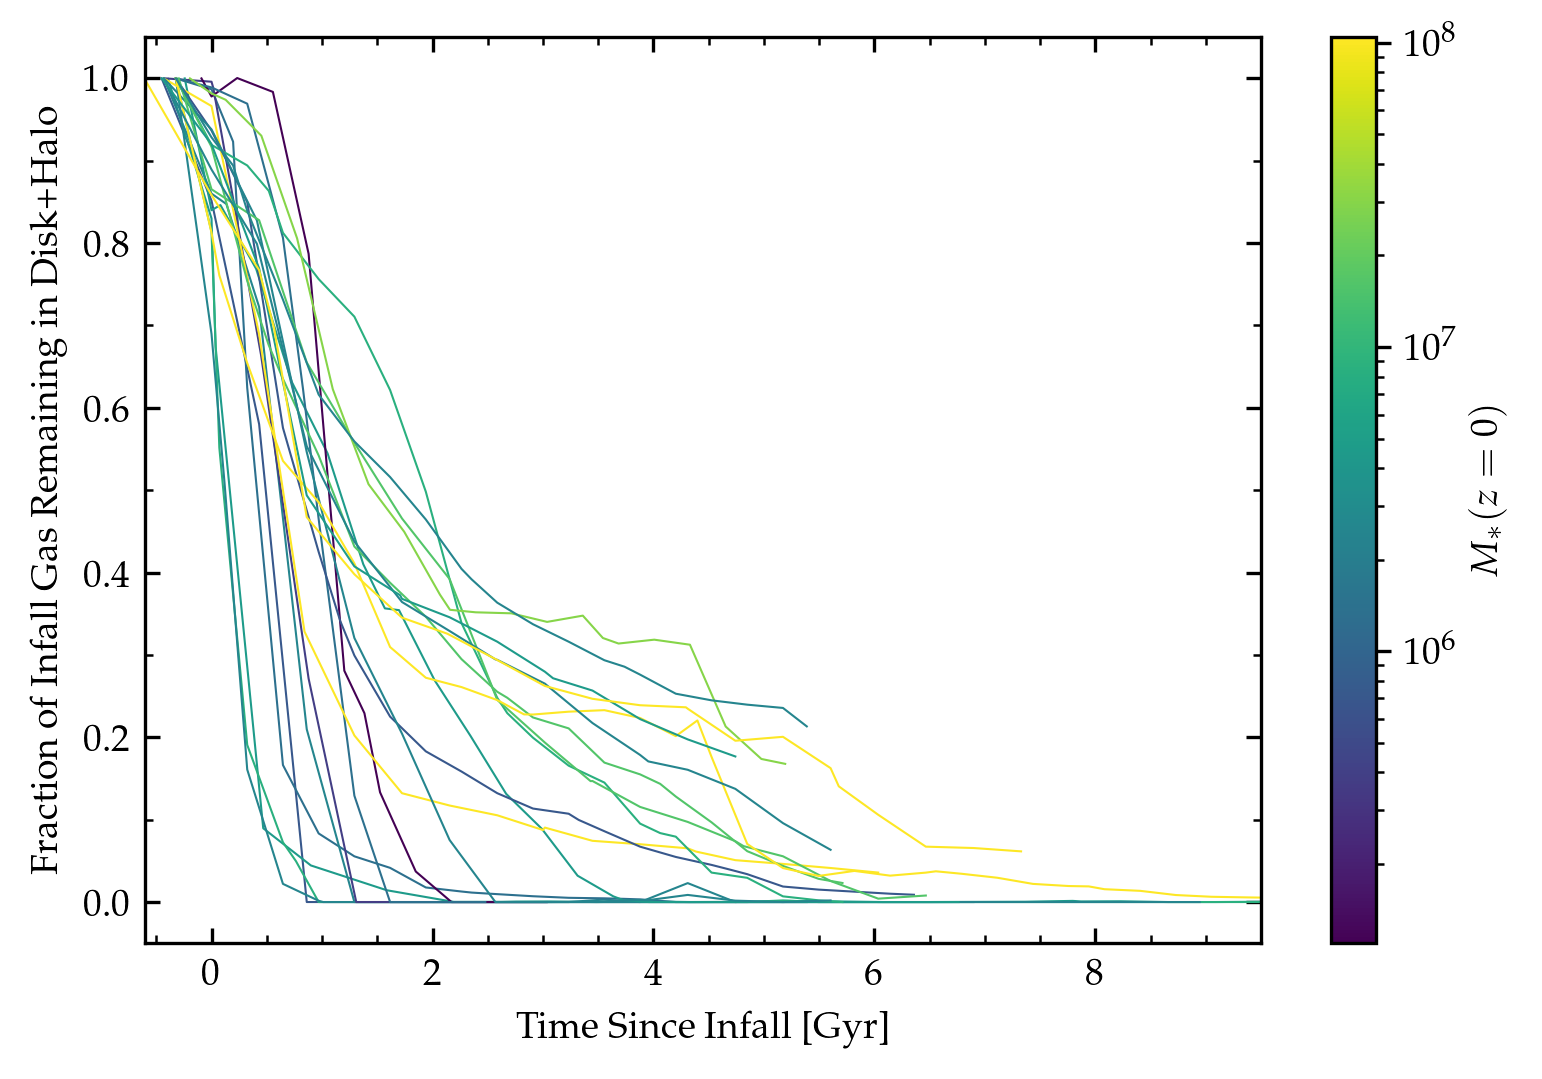

In [113]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)



data = read_tracking_data('HotGasTracking')
taus = np.sort(np.unique(data.tau))
sims_sorted, haloids_sorted = np.array([]), np.array([])
for tau in taus:
    sim = data.sim[data.tau==tau].tolist()[0]
    haloid = data.haloid[data.tau==tau].tolist()[0]
    sims_sorted = np.append(sims_sorted,sim)
    haloids_sorted = np.append(haloids_sorted,haloid)

data1 = read_tracking_data('HotGasTracking')
data2 = read_tracking_data('ColdGasTracking')

print(f'Plotting gas tracking data for the {len(np.unique(data.haloid))} satellites that quench after infall')

fig, ax = plt.subplots(1,1,dpi=300)

cmap_name = 'viridis'

cmap = mpl.cm.get_cmap(cmap_name, 12)

max_mass, min_mass = 104376733.61681984, 109637.24693921806

for i, (sim, haloid) in enumerate(zip(sims_sorted, haloids_sorted)):
    
    z0 = read_z0(sim)
    z0 = z0[z0.haloid == haloid]
    mstar = z0.M_star.tolist()[0]
    
    d1 = data1[(data1.sim==sim)&(data1.haloid == haloid)]
    d2 = data2[(data2.sim==sim)&(data2.haloid == haloid)]

    tinfall = np.mean(d1.tinfall)
    time = np.array(d1.t - (age-tinfall))

    gas_mass_1 = np.array(d1.gas_mass)
    gas_mass_initial_1 = np.sum(gas_mass_1[np.argmin(time)])
    gas_mass_2 = np.array(d2.gas_mass)
    gas_mass_initial_2 = np.sum(gas_mass_2[np.argmin(time)])
    
    frac_disk_1 = np.array(d1.frac_disk, dtype=float)
    frac_disk_2 = np.array(d2.frac_disk, dtype=float)
    frac_hot_1 = np.array(d1.frac_hot, dtype=float)
    frac_hot_2 = np.array(d2.frac_hot, dtype=float)

    gas_mass_initial = gas_mass_initial_1 + gas_mass_initial_2
    frac_remaining = (frac_disk_1*gas_mass_initial_1 + frac_disk_2*gas_mass_initial_2)/gas_mass_initial + (frac_hot_1*gas_mass_initial_1 + frac_hot_2*gas_mass_initial_2)/gas_mass_initial
    
#     frac_stripped_1 = np.array(d1.frac_stripped, dtype=float)
#     frac_stripped_2 = np.array(d2.frac_stripped, dtype=float)
    

    
#     frac_remaining = ((1-frac_stripped)*gas_mass_initial_1 + (1-frac_stripped_2)*gas_mass_initial_2)/gas_mass_initial
    
    color = cmap((np.log10(mstar)-np.log10(min_mass))/(np.log10(max_mass)-np.log10(min_mass)))
    im = ax.plot(time,frac_remaining,'k-', linewidth=0.5, color=color)
#    ax.plot(time,frac_hot,'k-', linewidth=0.5)

fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.LogNorm(vmin=min_mass, vmax=max_mass), cmap=cmap_name), ax=ax, label='$M_*(z=0)$')

ax.set_ylim(-0.05,1.05)
ax.set_ylabel('Fraction of Infall Gas Remaining in Disk+Halo')
# ax.set_ylabel(r'$M_{\mathrm{gas}}(t)/M_{\mathrm{gas}}(t_{\mathrm{infall}})$')
ax.set_xlabel('Time Since Infall [Gyr]')
ax.set_xlim(-0.6, 9.5)

ax.tick_params(direction='in',which='both')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))


fig.show()